**Problem statement**:
Water is the ultimate gift of nature to humanity and every living organism. Most of us have the luxury to lead our daily lives without feeling blunt of water scarcity but there are people in some parts of the world where they would have to walk several miles to have access to water. The situation worsens for them if this access, such as pumps, wells, or other water-points, also shuts down unexpectedly.


If a Machine Learning algorithm can predict which water point may fail in the immediate future, they can divert the maintenance resource towards that point with reasonable advance notice.

My goal is to build a logistic Regression which trains on the given data, is appropriately validated, and finally predicts on the test data provided to me.

**Column Explanation**

Id: A unique identifier for each water point.

Amount_of_water: The amount of water available at the water point.

Gps_height: The height of the water point in relation to sea level, as measured by GPS.

Waterpoint_type: The type of water point.

Basin_name: The name of the river basin the water point is located in.

Village: The name of the village the water point is located in.

Regionname: The name of the administrative region the water point is located in.

Region_code: The code of the administrative region the water point is located in.

Wardname: The name of the administrative ward the water point is located in.

District_code: The code of the administrative district the water point is located in.

Population: The population of the village the water point is located in.

Public_meeting: Whether or not there was a public meeting about the water point.

Organization_funding: The organization that funded the water point.

Organization_surveyed: Whether or not the organization surveyed the water point.

Scheme_management: The management of the water point scheme.

SchemeName: The name of the water point scheme.

Permit: Whether or not the water point has a permit.

Company_installed: The company that installed the water point.

Management: The type of management of the water point.

Management_group: The group that the management type of the water point belongs to.

Extraction_type: The type of extraction used to obtain water from the water point.

Extraction_type_group: The group that the extraction type of the water point belongs to.

Extraction_type_class: The class that the extraction type of the water point belongs to.

Payment: The type of payment for the water point.

Payment_type: The group that the payment type for the water point belongs to.

Water_quality: The quality of the water at the water point.

Quality_group: The group that the water quality at the water point belongs to.

Quantity: The quantity of water available at the water point.

Quantity_group: The group that the water quantity at the water point belongs to.

Source: The source of the water at the water point.

Source_type: The group that the source of the water at the water point belongs to.

Source_class: The class that the source of the water at the water point belongs to.

Waterpoint_type_group: The group that the water point type belongs to.

Status: The status of the water point, i.e. whether or not it is functional.

In [563]:
#Importing Data: importing the necessary libraries and the dataset. I use pandas library for importing data.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

EDA

In [564]:
# reading data
train_df = pd.read_csv('/content/train_data.csv')
test_df = pd.read_csv('/content/test_data.csv')

In [565]:
train_df.shape #shape of train data

(44068, 34)

In [566]:
test_df.shape #shape of test data

(11015, 33)

In [567]:
train_df.head(5) # checking first five rows of train data 

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,56421,0.0,1555,hand pump,basin3,village8556,region4,15,ward500,3,...,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,0
1,21324,500.0,857,communal standpipe multiple,basin7,village7372,region5,10,ward1800,5,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,0
2,74,0.0,0,communal standpipe,basin1,village9460,region6,17,ward883,3,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,0
3,74038,0.0,0,other,basin5,village13878,region13,18,ward1505,7,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,0
4,29929,0.0,0,hand pump,basin4,village5192,region6,14,ward942,4,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,1


In [568]:
test_df.head(5) #checking first five rows of test data

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,31547,0.0,1018,hand pump,basin2,village4319,region5,10,ward1777,4,...,pay when scheme fails,on failure,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump
1,34980,0.0,356,hand pump,basin8,village2412,region5,10,ward493,1,...,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump
2,54744,500.0,265,hand pump,basin7,village19173,region2,5,ward1546,3,...,pay monthly,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump
3,20884,0.0,1203,communal standpipe multiple,basin5,village1692,region18,20,ward643,6,...,unknown,unknown,soft,good,enough,enough,lake,river/lake,surface,communal standpipe
4,42440,0.0,0,communal standpipe,basin2,village17574,region19,12,ward1356,3,...,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe


In [569]:
train_df.tail(5)  #checking last five rows of train data

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
44063,33555,0.0,0,improved spring,basin5,village16282,region13,18,ward1422,2,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,1
44064,17775,0.0,618,hand pump,basin8,village10061,region5,10,ward2060,1,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,0
44065,34200,0.0,1582,communal standpipe,basin7,village9791,region12,11,ward1897,4,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,0
44066,17012,200.0,629,communal standpipe,basin6,village12243,region15,3,ward1248,3,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,1
44067,28533,0.0,1512,hand pump,basin1,village2454,region7,13,ward1948,4,...,never pay,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,0


In [570]:
test_df.tail(5)   #checking last five rows of test data

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
11010,50818,0.0,0,communal standpipe,basin1,village18251,region11,1,ward1020,1,...,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe
11011,58478,0.0,1408,communal standpipe,basin2,village2038,region12,11,ward1796,5,...,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe
11012,51919,0.0,0,communal standpipe,basin7,village17251,region19,12,ward1342,2,...,pay when scheme fails,on failure,soft,good,enough,enough,river,river/lake,surface,communal standpipe
11013,4475,0.0,0,communal standpipe,basin4,village13480,region8,14,ward1311,1,...,never pay,never pay,soft,good,enough,enough,dam,dam,surface,communal standpipe
11014,35884,0.0,233,hand pump,basin8,village15282,region16,80,ward2089,13,...,unknown,unknown,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump


In [571]:
train_df.describe(include='all')  # the summary statistics for all columns

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
count,44068.000000,44068.000000,44068.000000,44068,44068,44068,44068,44068.000000,44068,44068.000000,...,44068,44068,44068,44068,44068,44068,44068,44068,44068,44068.000000
unique,NaN,NaN,NaN,7,9,16471,21,NaN,2087,NaN,...,7,8,6,5,5,10,7,3,6,NaN
top,NaN,NaN,NaN,communal standpipe,basin5,village18166,region12,NaN,ward1290,NaN,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,NaN
freq,NaN,NaN,NaN,21085,7397,382,4190,NaN,240,NaN,...,18752,37551,37551,24610,24610,12617,12617,34384,25401,NaN
mean,37092.516384,329.781607,674.305460,NaN,NaN,NaN,NaN,15.224539,NaN,5.664382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.585640
std,21490.884249,3127.604462,698.062813,NaN,NaN,NaN,NaN,17.566722,NaN,9.670612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.492617
min,0.000000,0.000000,-63.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,18363.250000,0.000000,0.000000,NaN,NaN,NaN,NaN,5.000000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,37021.500000,0.000000,370.000000,NaN,NaN,NaN,NaN,12.000000,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,55685.250000,20.000000,1327.000000,NaN,NaN,NaN,NaN,17.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


The code train_df.describe(include='all') returns the summary statistics of a Pandas DataFrame named train_df, including descriptive statistics for both numeric and non-numeric columns.

The include='all' argument means that statistics will be calculated for all columns, including non-numeric columns such as object and categorical columns. Here's what each of the statistics means:

count: The number of non-null values for each column.

unique: The number of unique values for each column. Only applies to non-numeric columns.

top: The most frequently occurring value for each column. Only applies to non-numeric columns.

freq: The frequency of the most frequently occurring value for each column. Only applies to non-numeric columns.

mean: The mean value for each numeric column.

std: The standard deviation of the values for each numeric column.

min: The minimum value for each numeric column.

25%: The first quartile value (25th percentile) for each numeric column.

50%: The median value (50th percentile) for each numeric column.

75%: The third quartile value (75th percentile) for each numeric column.

max: The maximum value for each numeric column.

In [572]:
test_df.describe(include='all')  #the summary statistics for all columns of test dataset

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
count,11015.000000,11015.000000,11015.000000,11015,11015,11015,11015,11015.000000,11015,11015.000000,...,11015,11015,11015,11015,11015,11015,11015,11015,11015,11015
unique,NaN,NaN,NaN,6,9,6726,21,NaN,1879,NaN,...,7,7,8,6,5,5,10,7,3,5
top,NaN,NaN,NaN,communal standpipe,basin5,village17891,region12,NaN,ward1290,NaN,...,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe
freq,NaN,NaN,NaN,5177,1862,104,981,NaN,67,NaN,...,4689,4689,9363,9363,6176,6176,3250,3250,8669,6316
mean,37191.448933,288.939537,660.207263,NaN,NaN,NaN,NaN,15.529460,NaN,5.832410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21347.415727,2804.815011,689.647957,NaN,NaN,NaN,NaN,18.129926,NaN,10.026108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,0.000000,-90.000000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,19039.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,5.000000,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37120.000000,0.000000,361.000000,NaN,NaN,NaN,NaN,12.000000,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55503.500000,20.000000,1317.000000,NaN,NaN,NaN,NaN,17.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [573]:
train_df.columns #checking columns of train data

Index(['Id', 'Amount_of_water', 'Gps_height', 'Waterpoint_type', 'Basin_name',
       'Village', 'Regionname', 'Region_code', 'Wardname', 'District_code',
       'Population', 'Public_meeting', 'Organization_funding',
       'Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit',
       'Company_installed', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity',
       'Quantity_group', 'Source', 'Source_type', 'Source_class',
       'Waterpoint_type_group', 'Status'],
      dtype='object')

In the given list of columns, the following are the nominal variables:


Waterpoint_type

Basin_name

Village

Regionname

Public_meeting

Organization_funding

Organization_surveyed

Scheme_management

SchemeName

Permit

Company_installed

Management

Management_group

Extraction_type

Extraction_type_group

Extraction_type_class

Payment

Payment_type

Water_quality

Quality_group

Quantity

Quantity_group

Source

Source_type

Source_class

Waterpoint_type_group

Status


The following variables are ordinal:

Region_code

District_code


The following variables are numerical:

Id

Amount_of_water

Gps_height

Population

Note: This is just based on the column names, and the actual data and context of the problem may change the nature of some variables.


In [574]:
test_df.columns  #checking columns of test data

Index(['Id', 'Amount_of_water', 'Gps_height', 'Waterpoint_type', 'Basin_name',
       'Village', 'Regionname', 'Region_code', 'Wardname', 'District_code',
       'Population', 'Public_meeting', 'Organization_funding',
       'Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit',
       'Company_installed', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity',
       'Quantity_group', 'Source', 'Source_type', 'Source_class',
       'Waterpoint_type_group'],
      dtype='object')

In [575]:
train_df.info() # understand the structure of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44068 entries, 0 to 44067
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     44068 non-null  int64  
 1   Amount_of_water        44068 non-null  float64
 2   Gps_height             44068 non-null  int64  
 3   Waterpoint_type        44068 non-null  object 
 4   Basin_name             44068 non-null  object 
 5   Village                44068 non-null  object 
 6   Regionname             44068 non-null  object 
 7   Region_code            44068 non-null  int64  
 8   Wardname               44068 non-null  object 
 9   District_code          44068 non-null  int64  
 10  Population             44068 non-null  int64  
 11  Public_meeting         41543 non-null  object 
 12  Organization_funding   41468 non-null  object 
 13  Organization_surveyed  44068 non-null  object 
 14  Scheme_management      41138 non-null  object 
 15  Sc

In [576]:
test_df.info() # understand the structure of test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     11015 non-null  int64  
 1   Amount_of_water        11015 non-null  float64
 2   Gps_height             11015 non-null  int64  
 3   Waterpoint_type        11015 non-null  object 
 4   Basin_name             11015 non-null  object 
 5   Village                11015 non-null  object 
 6   Regionname             11015 non-null  object 
 7   Region_code            11015 non-null  int64  
 8   Wardname               11015 non-null  object 
 9   District_code          11015 non-null  int64  
 10  Population             11015 non-null  int64  
 11  Public_meeting         10362 non-null  object 
 12  Organization_funding   11015 non-null  object 
 13  Organization_surveyed  11015 non-null  object 
 14  Scheme_management      10291 non-null  object 
 15  Sc

Why we check unique values:
This information can be useful to understand the cardinality of the values in each column and to identify columns that may contain categorical or nominal data.


For example, if a column has only a few unique values, it may indicate that it represents a categorical variable. On the other hand, if a column has many unique values, it may indicate that it represents a continuous variable.

In [577]:
# to understand the unique values in train dataset 
train_df.nunique()

Id                       44068
Amount_of_water             91
Gps_height                2389
Waterpoint_type              7
Basin_name                   9
Village                  16471
Regionname                  21
Region_code                 27
Wardname                  2087
District_code               20
Population                 955
Public_meeting               2
Organization_funding      2380
Organization_surveyed        1
Scheme_management           12
SchemeName                2505
Permit                       2
Company_installed         1873
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoi

In [578]:
test_df.nunique()   # to understand the unique values in test dataset

Id                       11015
Amount_of_water             67
Gps_height                2031
Waterpoint_type              6
Basin_name                   9
Village                   6726
Regionname                  21
Region_code                 26
Wardname                  1879
District_code               20
Population                 536
Public_meeting               2
Organization_funding      1216
Organization_surveyed        1
Scheme_management           11
SchemeName                1578
Permit                       2
Company_installed         1233
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoi

unique values of each column in train  and test datasets




In [579]:
train_df['Waterpoint_type'].unique()


array(['hand pump', 'communal standpipe multiple', 'communal standpipe',
       'other', 'improved spring', 'dam', 'cattle trough'], dtype=object)

In [580]:
test_df['Waterpoint_type'].unique()

array(['hand pump', 'communal standpipe multiple', 'communal standpipe',
       'improved spring', 'other', 'cattle trough'], dtype=object)

In [581]:
train_df['Basin_name'].unique()

array(['basin3', 'basin7', 'basin1', 'basin5', 'basin4', 'basin2',
       'basin9', 'basin8', 'basin6'], dtype=object)

In [582]:
test_df['Basin_name'].unique()

array(['basin2', 'basin8', 'basin7', 'basin5', 'basin4', 'basin9',
       'basin1', 'basin6', 'basin3'], dtype=object)

In [583]:
train_df['Regionname'].unique()

array(['region4', 'region5', 'region6', 'region13', 'region12',
       'region17', 'region2', 'region16', 'region18', 'region3',
       'region19', 'region1', 'region9', 'region21', 'region14',
       'region20', 'region7', 'region11', 'region8', 'region15',
       'region10'], dtype=object)

In [584]:
test_df['Regionname'].unique()

array(['region5', 'region2', 'region18', 'region19', 'region8', 'region3',
       'region13', 'region21', 'region7', 'region14', 'region6',
       'region16', 'region10', 'region4', 'region12', 'region15',
       'region1', 'region11', 'region9', 'region17', 'region20'],
      dtype=object)

In [585]:
train_df['Region_code'].unique()

array([15, 10, 17, 18, 14, 11, 21,  5,  8, 20, 60, 12,  2,  6,  4, 19, 16,
       90, 13, 24,  1,  3, 80,  9,  7, 99, 40])

In [586]:
test_df['Region_code'].unique()

array([10,  5, 20, 12, 14,  6, 18, 19, 13, 16, 17, 80,  7, 15,  8, 11,  3,
        2,  1,  4, 60, 21, 24,  9, 90, 99])

In [587]:
train_df['District_code'].unique()

array([ 3,  5,  7,  4,  6, 63,  1,  2, 33, 30, 43,  8, 60, 53, 23, 13, 62,
        0, 80, 67])

In [588]:
test_df['District_code'].unique()

array([ 4,  1,  3,  6,  5,  2, 13,  7, 23,  8, 60, 43, 30, 53, 33, 80, 63,
       62,  0, 67])

In [589]:
train_df['Public_meeting'].unique()

array([False, True, nan], dtype=object)

In [590]:
test_df['Public_meeting'].unique()

array([True, False, nan], dtype=object)

In [591]:
train_df['Scheme_management'].unique()

array(['VWC', 'WUG', nan, 'Water authority', 'Other', 'Parastatal', 'WUA',
       'Water Board', 'Private operator', 'Company', 'Trust', 'SWC',
       'None'], dtype=object)

In [592]:
test_df['Scheme_management'].unique()

array(['VWC', nan, 'Company', 'Private operator', 'Other', 'WUG',
       'Water authority', 'WUA', 'Water Board', 'Parastatal', 'Trust',
       'SWC'], dtype=object)

In [593]:
train_df['Permit'].unique()

array([False, True, nan], dtype=object)

In [594]:
test_df['Permit'].unique()

array([True, False, nan], dtype=object)

In [595]:
train_df['Management'].unique()

array(['parastatal', 'vwc', 'wug', 'water board', 'wua',
       'water authority', 'private operator', 'other', 'company',
       'unknown', 'trust', 'other - school'], dtype=object)

In [596]:
test_df['Management'].unique()

array(['vwc', 'private operator', 'wug', 'other', 'water board',
       'unknown', 'parastatal', 'wua', 'company', 'water authority',
       'trust', 'other - school'], dtype=object)

In [597]:
train_df['Management_group'].unique()

array(['parastatal', 'user-group', 'commercial', 'other', 'unknown'],
      dtype=object)

In [598]:
test_df['Management_group'].unique()

array(['user-group', 'commercial', 'other', 'unknown', 'parastatal'],
      dtype=object)

In [599]:
train_df['Extraction_type'].unique()

array(['nira/tanira', 'gravity', 'windmill', 'other', 'afridev',
       'submersible', 'other - swn 81', 'swn 80', 'india mark ii',
       'other - play pump', 'other - rope pump', 'mono', 'ksb',
       'india mark iii', 'cemo', 'walimi', 'climax',
       'other - mkulima/shinyanga'], dtype=object)

In [600]:
test_df['Extraction_type'].unique()

array(['india mark ii', 'swn 80', 'submersible', 'gravity', 'other',
       'ksb', 'mono', 'other - rope pump', 'nira/tanira',
       'other - swn 81', 'afridev', 'windmill', 'india mark iii',
       'climax', 'walimi', 'cemo', 'other - play pump',
       'other - mkulima/shinyanga'], dtype=object)

In [601]:
train_df['Extraction_type_group'].unique()

array(['nira/tanira', 'gravity', 'wind-powered', 'other', 'afridev',
       'submersible', 'other handpump', 'swn 80', 'india mark ii',
       'rope pump', 'mono', 'india mark iii', 'other motorpump'],
      dtype=object)

In [602]:
test_df['Extraction_type_group'].unique()

array(['india mark ii', 'swn 80', 'submersible', 'gravity', 'other',
       'mono', 'rope pump', 'nira/tanira', 'other handpump', 'afridev',
       'wind-powered', 'india mark iii', 'other motorpump'], dtype=object)

In [603]:
train_df['Extraction_type_class'].unique()

array(['handpump', 'gravity', 'wind-powered', 'other', 'submersible',
       'rope pump', 'motorpump'], dtype=object)

In [604]:
test_df['Extraction_type_class'].unique()

array(['handpump', 'submersible', 'gravity', 'other', 'motorpump',
       'rope pump', 'wind-powered'], dtype=object)

In [605]:
train_df['Payment'].unique()

array(['never pay', 'pay monthly', 'pay when scheme fails',
       'pay per bucket', 'unknown', 'pay annually', 'other'], dtype=object)

In [606]:
test_df['Payment'].unique()

array(['pay when scheme fails', 'never pay', 'pay monthly', 'unknown',
       'pay per bucket', 'other', 'pay annually'], dtype=object)

In [607]:
train_df['Payment_type'].unique()

array(['never pay', 'monthly', 'on failure', 'per bucket', 'unknown',
       'annually', 'other'], dtype=object)

In [608]:
test_df['Payment_type'].unique()

array(['on failure', 'never pay', 'monthly', 'unknown', 'per bucket',
       'other', 'annually'], dtype=object)

In [609]:
train_df['Water_quality'].unique()

array(['salty', 'soft', 'fluoride', 'salty abandoned', 'coloured',
       'milky', 'unknown', 'fluoride abandoned'], dtype=object)

In [610]:
test_df['Water_quality'].unique()

array(['soft', 'salty', 'unknown', 'fluoride', 'milky', 'salty abandoned',
       'coloured', 'fluoride abandoned'], dtype=object)

In [611]:
train_df['Source'].unique()

array(['shallow well', 'river', 'machine dbh', 'spring',
       'rainwater harvesting', 'dam', 'lake', 'hand dtw', 'other',
       'unknown'], dtype=object)

In [612]:
test_df['Source'].unique()

array(['shallow well', 'machine dbh', 'lake', 'spring', 'dam', 'river',
       'rainwater harvesting', 'hand dtw', 'other', 'unknown'],
      dtype=object)

In [613]:
train_df['Source_type'].unique()

array(['shallow well', 'river/lake', 'borehole', 'spring',
       'rainwater harvesting', 'dam', 'other'], dtype=object)

In [614]:
test_df['Source_type'].unique()

array(['shallow well', 'borehole', 'river/lake', 'spring', 'dam',
       'rainwater harvesting', 'other'], dtype=object)

In [615]:
train_df['Source_class'].unique()

array(['groundwater', 'surface', 'unknown'], dtype=object)

In [616]:
test_df['Source_class'].unique()

array(['groundwater', 'surface', 'unknown'], dtype=object)

In [617]:
train_df['Waterpoint_type_group'].unique()

array(['hand pump', 'communal standpipe', 'other', 'improved spring',
       'dam', 'cattle trough'], dtype=object)

In [618]:
test_df['Waterpoint_type_group'].unique()

array(['hand pump', 'communal standpipe', 'improved spring', 'other',
       'cattle trough'], dtype=object)

 **Preprocessing**

 1.Handling The Missing Values

In [619]:
train_df.isnull().sum() #checking null values in train data

Id                           0
Amount_of_water              0
Gps_height                   0
Waterpoint_type              0
Basin_name                   0
Village                      0
Regionname                   0
Region_code                  0
Wardname                     0
District_code                0
Population                   0
Public_meeting            2525
Organization_funding      2600
Organization_surveyed        0
Scheme_management         2930
SchemeName               20951
Permit                    2227
Company_installed         2603
Management                   0
Management_group             0
Extraction_type              0
Extraction_type_group        0
Extraction_type_class        0
Payment                      0
Payment_type                 0
Water_quality                0
Quality_group                0
Quantity                     0
Quantity_group               0
Source                       0
Source_type                  0
Source_class                 0
Waterpoi

In [620]:
test_df.isnull().sum()  #checking null values in test data

Id                          0
Amount_of_water             0
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Village                     0
Regionname                  0
Region_code                 0
Wardname                    0
District_code               0
Population                  0
Public_meeting            653
Organization_funding        0
Organization_surveyed       0
Scheme_management         724
SchemeName               5211
Permit                    529
Company_installed           0
Management                  0
Management_group            0
Extraction_type             0
Extraction_type_group       0
Extraction_type_class       0
Payment                     0
Payment_type                0
Water_quality               0
Quality_group               0
Quantity                    0
Quantity_group              0
Source                      0
Source_type                 0
Source_class                0
Waterpoint_type_group       0
dtype: int

In [621]:
#filling null values of Public_meeting column in train dataset
train_df['Public_meeting'].fillna(method='ffill', inplace=True)
#train_df['Public_meeting'].fillna(train_df['Public_meeting'].mode()[0], inplace=True)


In [622]:
#filling null values of Public_meeting column in test dataset
test_df['Public_meeting'].fillna(method='ffill', inplace=True) #filling null values with previous non null values.

In [623]:
#filling null values of Organization_funding column in train dataset
train_df['Organization_funding'].fillna(value='unknown', inplace=True)
#train_df['Organization_funding'].fillna(train_df['Organization_funding'].mode()[0], inplace=True)

In [624]:
#filling null values of Scheme_management column in train dataset
train_df['Scheme_management'].fillna(train_df['Scheme_management'].mode()[0], inplace=True)

In [625]:
#filling null values of Scheme_management column in test dataset
test_df['Scheme_management'].fillna(test_df['Scheme_management'].mode()[0], inplace=True) #filling null values with mode.

In [626]:
#filling null values of SchemeName column in train dataset
train_df['SchemeName'].fillna(train_df['SchemeName'].mode()[0], inplace=True)

In [627]:
#filling null values of SchemeName column in test dataset
test_df['SchemeName'].fillna(test_df['SchemeName'].mode()[0], inplace=True)  #filling null values with mode.

In [628]:
#filling null values of Permit column in train dataset
train_df['Permit'].fillna(train_df['Permit'].mode()[0], inplace=True)

In [629]:
#filling null values of Permit column in test dataset
test_df['Permit'].fillna(test_df['Permit'].mode()[0], inplace=True)   #filling null values with mode.

In [630]:
#filling null values of Company_installed column in train dataset
train_df['Company_installed'].fillna(train_df['Company_installed'].mode()[0], inplace=True)

In [631]:
train_df.isnull().sum()  #checking for null values after filling

Id                       0
Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
Status                   0
dtype: int64

In [632]:
test_df.isnull().sum()  #checking null values in test dataset after filling.

Id                       0
Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
dtype: int64

2.Encoding the data

In [633]:
#Identifying exact number of data types
obj = (train_df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (train_df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (train_df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 25
Integer variables: 6
Float variables: 1


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

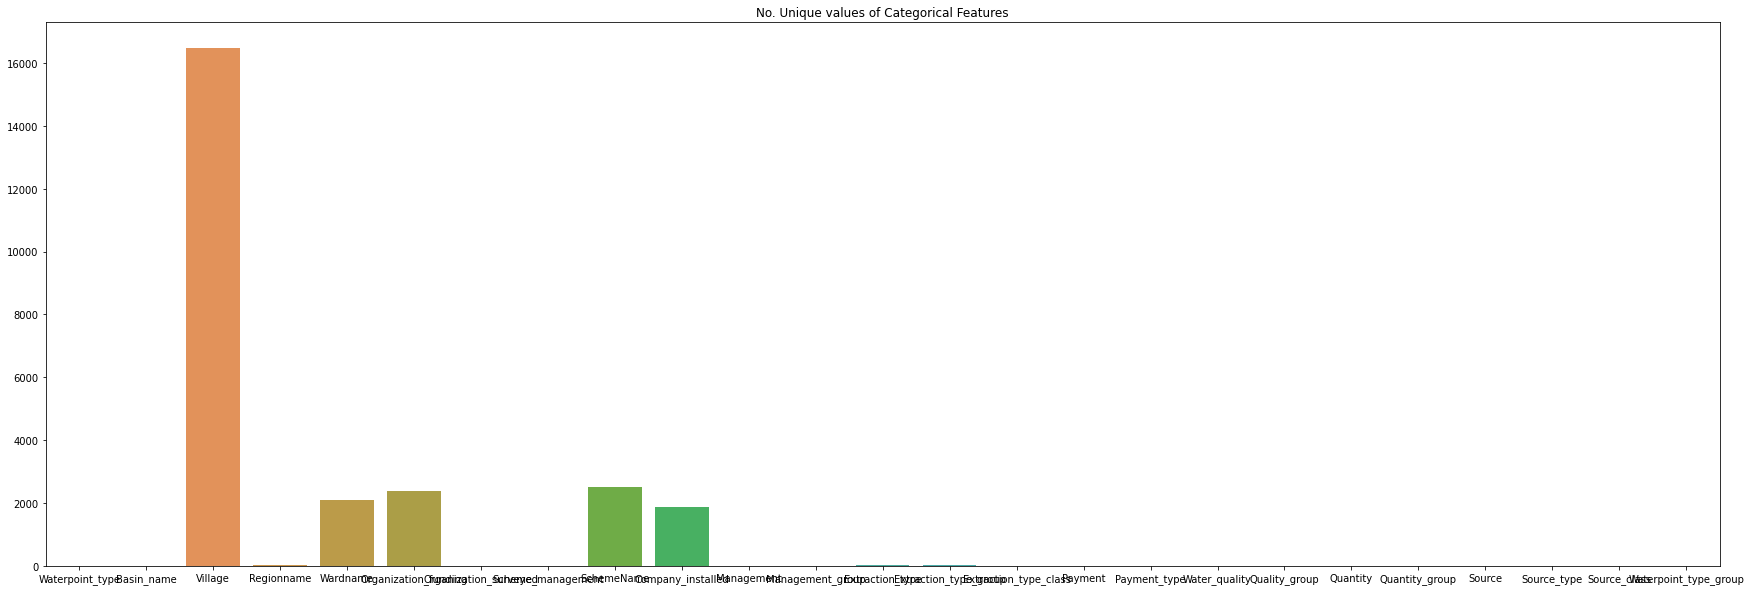

In [634]:
unique_values = []
for col in object_cols:
  unique_values.append(train_df[col].unique().size)
plt.figure(figsize=(30,10))
plt.title('No. Unique values of Categorical Features')
sns.barplot(x=object_cols,y=unique_values)

In [635]:
#Identifying exact number of data types
obj = (test_df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (test_df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (test_df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 25
Integer variables: 5
Float variables: 1


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

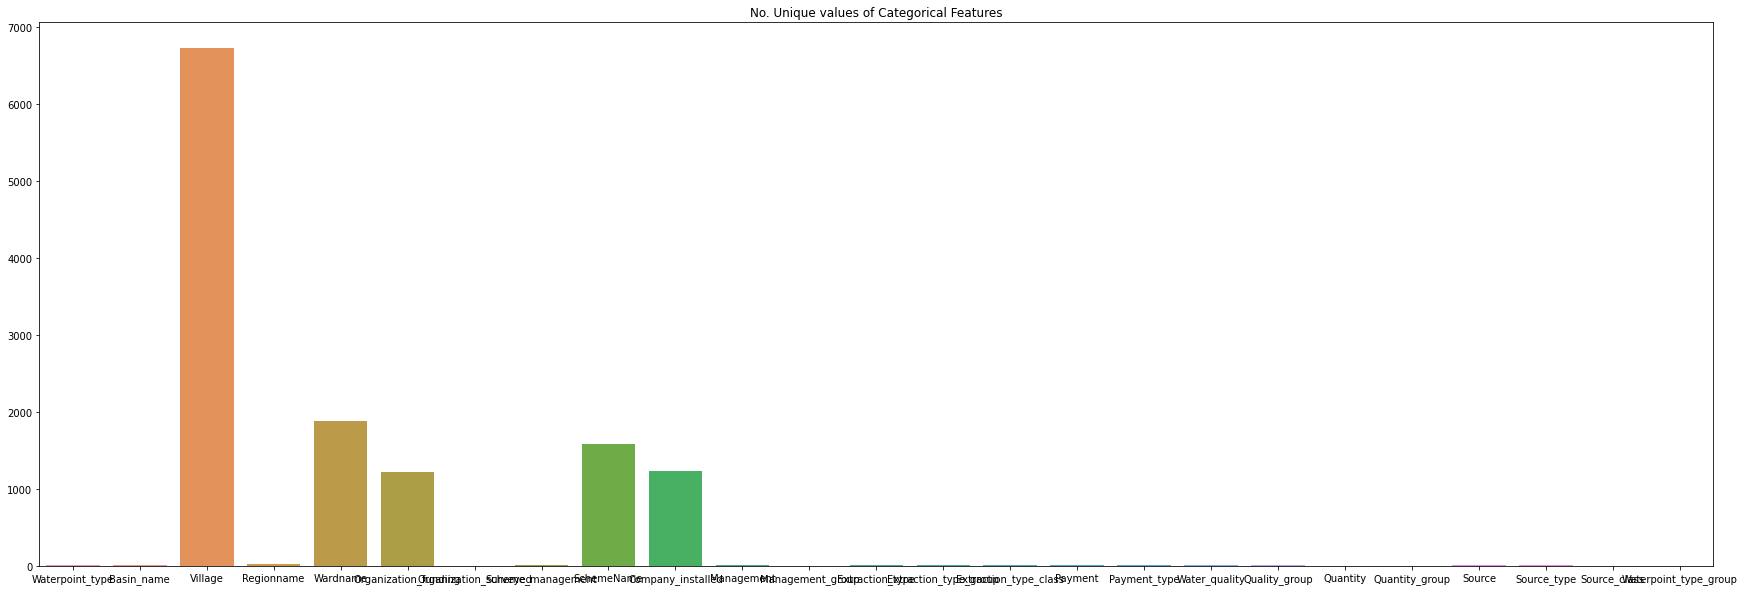

In [636]:
unique_values = []
for col in object_cols:
  unique_values.append(test_df[col].unique().size)
plt.figure(figsize=(30,10))
plt.title('No. Unique values of Categorical Features')
sns.barplot(x=object_cols,y=unique_values)

In [637]:
categorical_columns=['Waterpoint_type', 'Basin_name','Village', 'Regionname','Wardname','Public_meeting', 'Organization_funding','Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit','Company_installed', 'Management', 'Management_group','Extraction_type', 'Extraction_type_group', 'Extraction_type_class', 'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity','Quantity_group', 'Source', 'Source_type', 'Source_class','Waterpoint_type_group',]

In [638]:
for i in categorical_columns:
  train_df[i]=train_df[i].astype('category').cat.codes

In [639]:
categorical_list=['Waterpoint_type', 'Basin_name','Village', 'Regionname','Wardname','Public_meeting', 'Organization_funding','Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit','Company_installed', 'Management', 'Management_group','Extraction_type', 'Extraction_type_group', 'Extraction_type_class', 'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity','Quantity_group', 'Source', 'Source_type', 'Source_class','Waterpoint_type_group',]

In [640]:
for i in categorical_list:
  test_df[i]=test_df[i].astype('category').cat.codes

3. Drop Unnecessary columns

In [641]:
train_df=train_df.drop(['Village'],axis=1) #drop Villege column from train dataset


test_df=test_df.drop(['Village'],axis=1) #drop Villege column from test dataset


train_df=train_df.drop(['SchemeName'],axis=1)  #drop SchemeName column from train dataset


test_df=test_df.drop(['SchemeName'],axis=1)   #drop SchemeName column from test dataset

train_df=train_df.drop(['Quantity'],axis=1)  #drop Quantity column from test dataset

test_df=test_df.drop(['Quantity'],axis=1)   #drop Quantity column from test dataset

train_df=train_df.drop(['Source'],axis=1)   #drop Source  column from test dataset

test_df=test_df.drop(['Source'],axis=1)   #drop Source  column from test dataset


train_df=train_df.drop(['Company_installed'],axis=1)    #drop Company_installed column from train dataset


test_df=test_df.drop(['Company_installed'],axis=1)     #drop Company_installed column from test dataset


train_df=train_df.drop(['Id'],axis=1)     #drop Id column from train dataset


test_df=test_df.drop(['Id'],axis=1)      #drop Id column from test dataset


train_df=train_df.drop(['Extraction_type_class'],axis=1)  #drop Extraction_type_class from train dataset


test_df=test_df.drop(['Extraction_type_class'],axis=1)  #drop Extraction_type_class from test dataset

**Id:** This is just a unique identifier for each row and does not contain any information that could be useful for prediction.

**Village:**The geographic location is already represented by other columns such as Regionname and Wardname.

**SchemeName:** This may not be necessary for predicting whether a waterpoint is functional or not, especially if the information is already captured by other columns such as Scheme_management.

**Company_installed:** This information may not be necessary for predicting the status of a waterpoint and could be redundant if captured by other columns such as Organization_funding.

In [642]:
train_df

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,Region_code,Wardname,District_code,Population,Public_meeting,...,Extraction_type_group,Payment,Payment_type,Water_quality,Quality_group,Quantity_group,Source_type,Source_class,Waterpoint_type_group,Status
0,0.0,1555,4,2,15,15,1536,3,650,0,...,5,0,2,4,4,2,5,0,3,0
1,500.0,857,2,6,16,10,889,5,600,0,...,1,3,1,6,2,2,4,1,1,0
2,0.0,0,1,0,17,17,1958,3,0,1,...,12,0,2,6,2,2,0,0,1,0
3,0.0,0,6,4,4,18,563,7,0,1,...,6,0,2,6,2,2,5,0,5,0
4,0.0,0,4,3,17,14,2024,4,0,1,...,0,0,2,6,2,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44063,0.0,0,5,4,4,18,471,2,0,1,...,1,0,2,6,2,2,6,0,4,1
44064,0.0,618,4,7,16,10,1178,1,1,1,...,7,4,5,6,2,1,0,0,3,0
44065,0.0,1582,1,6,3,11,995,4,80,1,...,1,0,2,6,2,1,4,1,1,0
44066,200.0,629,1,5,6,3,277,3,120,1,...,1,3,1,6,2,1,6,0,1,1


In [643]:
train_df.shape

(44068, 27)

In [644]:
test_df.shape

(11015, 26)

In [645]:
test_df

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,Region_code,Wardname,District_code,Population,Public_meeting,...,Extraction_type,Extraction_type_group,Payment,Payment_type,Water_quality,Quality_group,Quantity_group,Source_type,Source_class,Waterpoint_type_group
0,0.0,1018,3,1,16,10,769,4,0,1,...,4,2,5,3,6,2,0,5,0,2
1,0.0,356,3,7,16,10,1372,1,1,0,...,15,11,0,2,6,2,1,0,0,2
2,500.0,265,3,6,11,5,540,3,600,1,...,15,11,3,1,6,2,2,5,0,2
3,0.0,1203,2,4,9,20,1524,6,200,1,...,14,10,6,6,6,2,1,4,1,1
4,0.0,0,1,1,10,12,352,3,0,1,...,3,1,3,1,6,2,1,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,0.0,0,1,0,2,1,23,1,0,1,...,1,8,4,5,6,2,1,0,0,1
11011,0.0,1408,1,1,3,11,787,5,0,1,...,3,1,0,2,6,2,1,6,0,1
11012,0.0,0,1,6,10,12,337,2,0,0,...,3,1,5,3,6,2,1,4,1,1
11013,0.0,0,1,3,19,14,306,1,0,0,...,7,4,0,2,6,2,1,1,1,1


4.Handling outliers

<Axes: >

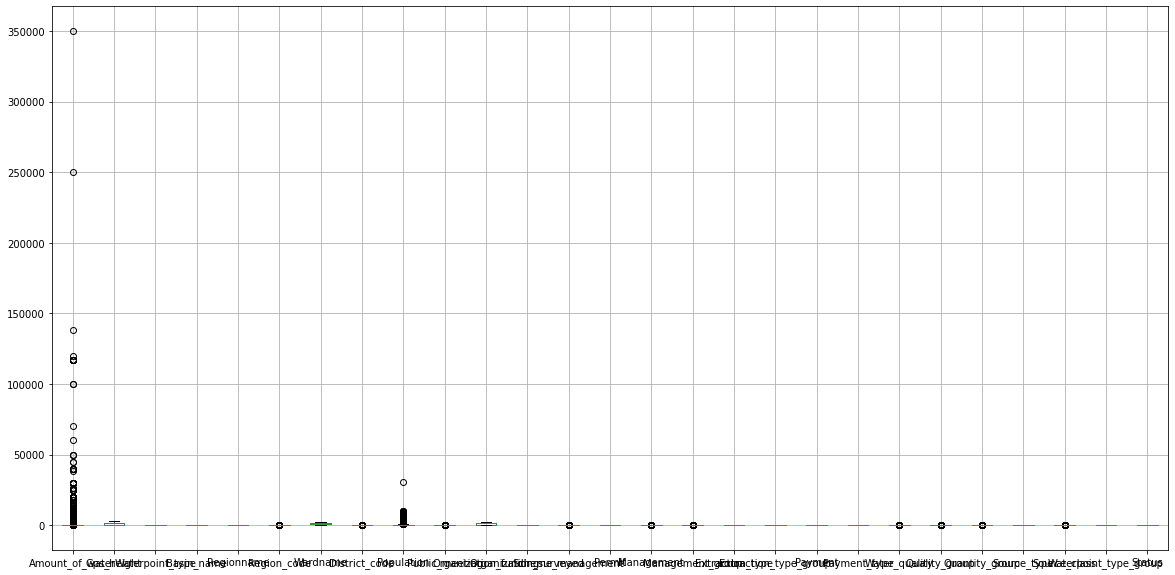

In [646]:
# box plot for checking outliers
train_df.boxplot(figsize=(20,10))

<Axes: >

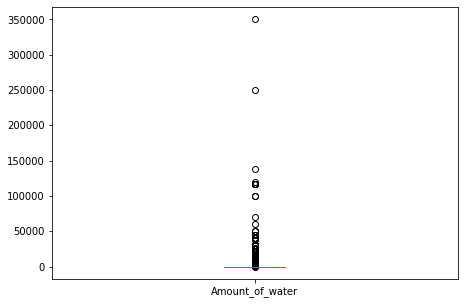

In [647]:
plt.subplot(121)
train_df['Amount_of_water'].plot.box(figsize=(16,5))

<Axes: >

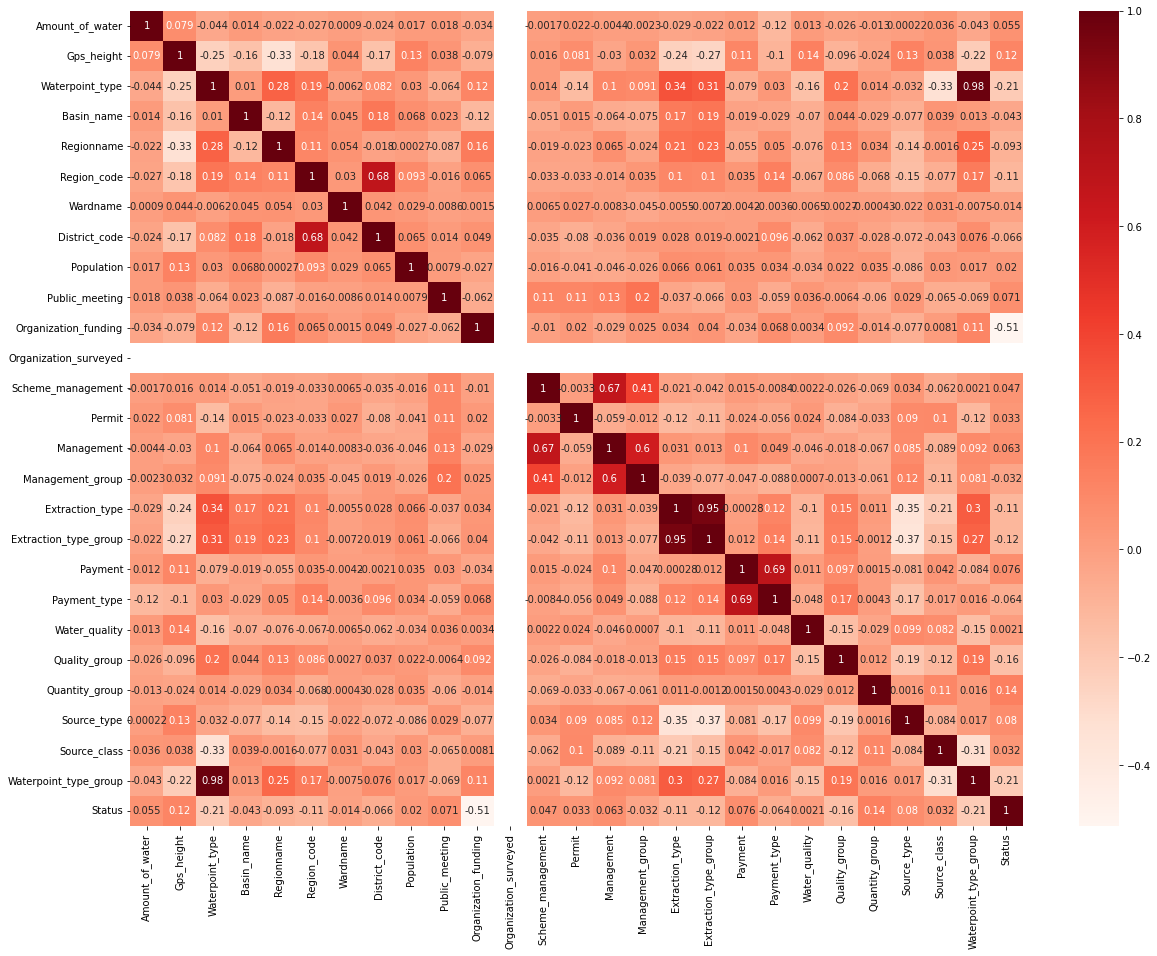

In [648]:
fig, ax = plt.subplots(figsize=(20,15))  #heat map to understand correlation
sns.heatmap(train_df.corr(),annot=True,cmap='Reds')

In [649]:
train_df["Status"].value_counts() #checking data is balanced or not

1    25808
0    18260
Name: Status, dtype: int64

In [650]:
train_df["Status"].value_counts(normalize=True)*100 #object containing the percentage of each unique value in the "Status" column. 

1    58.564037
0    41.435963
Name: Status, dtype: float64

<Axes: title={'center': 'Status of water scarcity'}>

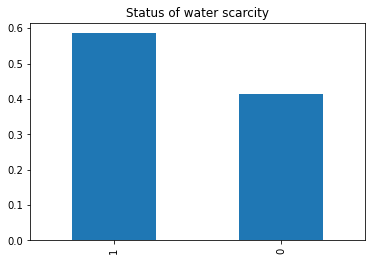

In [651]:
train_df["Status"].value_counts(normalize=True).plot.bar(title = 'Status of water scarcity')

In [652]:
q=train_df['Amount_of_water'].quantile(0.90)
train_df_cleaned =train_df[train_df['Amount_of_water']<q]

In [653]:
train_df_cleaned.describe()

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,Region_code,Wardname,District_code,Population,Public_meeting,...,Extraction_type_group,Payment,Payment_type,Water_quality,Quality_group,Quantity_group,Source_type,Source_class,Waterpoint_type_group,Status
count,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000,...,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000,38206.000000
mean,16.485522,591.006858,2.661729,4.022667,10.071376,15.915118,1055.295346,6.031854,172.950165,0.899309,...,4.143564,2.258886,3.162226,5.730985,2.294901,1.322044,3.910956,0.219651,2.123122,0.553264
std,53.146276,676.403537,1.816084,2.498016,5.935655,18.558608,598.424358,10.236024,478.118762,0.300923,...,3.520254,2.407707,1.752942,0.939068,0.822539,0.832899,2.220516,0.427392,1.417069,0.497161
min,0.000000,-63.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,5.000000,5.000000,552.000000,2.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,6.000000,2.000000,1.000000,3.000000,0.000000,1.000000,0.000000
50%,0.000000,252.000000,2.000000,4.000000,10.000000,12.000000,1041.000000,3.000000,1.000000,1.000000,...,4.000000,1.000000,2.000000,6.000000,2.000000,1.000000,5.000000,0.000000,1.000000,1.000000
75%,0.000000,1263.750000,4.000000,6.000000,15.000000,18.000000,1585.000000,5.000000,200.000000,1.000000,...,6.000000,4.000000,5.000000,6.000000,2.000000,2.000000,6.000000,0.000000,3.000000,1.000000
max,450.000000,2628.000000,6.000000,8.000000,20.000000,99.000000,2086.000000,80.000000,30500.000000,1.000000,...,12.000000,6.000000,6.000000,7.000000,5.000000,4.000000,6.000000,2.000000,5.000000,1.000000


In [654]:
train_df_cleaned.head(5)

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,Region_code,Wardname,District_code,Population,Public_meeting,...,Extraction_type_group,Payment,Payment_type,Water_quality,Quality_group,Quantity_group,Source_type,Source_class,Waterpoint_type_group,Status
0,0.0,1555,4,2,15,15,1536,3,650,0,...,5,0,2,4,4,2,5,0,3,0
2,0.0,0,1,0,17,17,1958,3,0,1,...,12,0,2,6,2,2,0,0,1,0
3,0.0,0,6,4,4,18,563,7,0,1,...,6,0,2,6,2,2,5,0,5,0
4,0.0,0,4,3,17,14,2024,4,0,1,...,0,0,2,6,2,1,0,0,3,1
5,0.0,1728,1,1,3,11,920,5,108,1,...,1,5,3,6,2,1,4,1,1,1


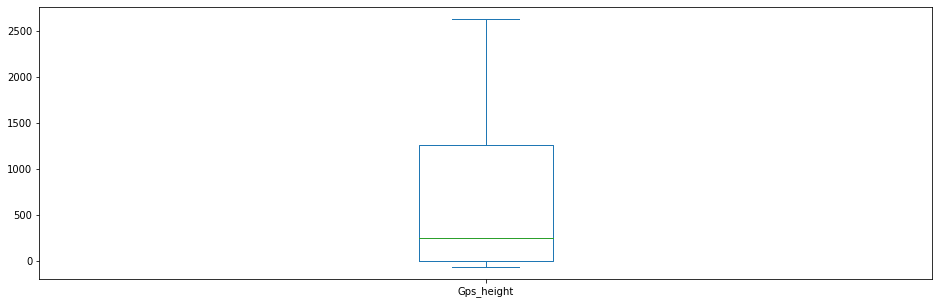

In [655]:
train_df_cleaned['Gps_height'].plot.box(figsize=(16,5))

plt.show()

<Axes: >

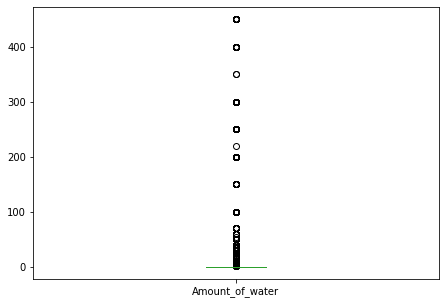

In [656]:
plt.subplot(121)
train_df_cleaned['Amount_of_water'].plot.box(figsize=(16,5))

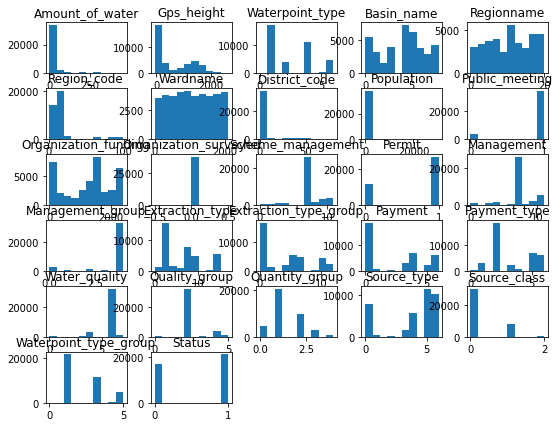

In [657]:
train_df_cleaned.hist(bins=10,figsize=(9,7),grid=False);

In [658]:
#sns.pairplot(train_df_cleaned)

Splitting Data

In [659]:
## Dividing Independent and Dependent Variables
x=train_df_cleaned.drop('Status',axis=1)
y=train_df_cleaned['Status']

In [660]:
x.shape

(38206, 26)

In [661]:
x.head()

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,Region_code,Wardname,District_code,Population,Public_meeting,...,Extraction_type,Extraction_type_group,Payment,Payment_type,Water_quality,Quality_group,Quantity_group,Source_type,Source_class,Waterpoint_type_group
0,0.0,1555,4,2,15,15,1536,3,650,0,...,8,5,0,2,4,4,2,5,0,3
2,0.0,0,1,0,17,17,1958,3,0,1,...,17,12,0,2,6,2,2,0,0,1
3,0.0,0,6,4,4,18,563,7,0,1,...,9,6,0,2,6,2,2,5,0,5
4,0.0,0,4,3,17,14,2024,4,0,1,...,0,0,0,2,6,2,1,0,0,3
5,0.0,1728,1,1,3,11,920,5,108,1,...,3,1,5,3,6,2,1,4,1,1


In [662]:
y.shape

(38206,)

In [663]:
y.head()

0    0
2    0
3    0
4    1
5    1
Name: Status, dtype: int64

In [664]:
import random

def train_test_split(x, y, test_size=0.2, random_state=123):
    """
    Splits the data into training and testing sets.
    """
    if random_state:
      random.seed(random_state)

## Taking random sample
      n_samples = x.shape[0]
      n_test=int(n_samples*test_size)
      test_indices=random.sample(range(n_samples),n_test)
      train_indices=list(set(range(n_samples))-set(test_indices))

      x_train=x[train_indices]
      y_train=y[train_indices]
      x_val=x[test_indices]
      y_val=y[test_indices]

    return x_train, x_val, y_train, y_val

In [665]:
def prepare_data(x,y,split_size=0.2):
  x_train, x_val, y_train, y_val=train_test_split(x,y, test_size=split_size)

In [666]:
train_df_cleaned.dtypes

Amount_of_water          float64
Gps_height                 int64
Waterpoint_type             int8
Basin_name                  int8
Regionname                  int8
Region_code                int64
Wardname                   int16
District_code              int64
Population                 int64
Public_meeting              int8
Organization_funding       int16
Organization_surveyed       int8
Scheme_management           int8
Permit                      int8
Management                  int8
Management_group            int8
Extraction_type             int8
Extraction_type_group       int8
Payment                     int8
Payment_type                int8
Water_quality               int8
Quality_group               int8
Quantity_group              int8
Source_type                 int8
Source_class                int8
Waterpoint_type_group       int8
Status                     int64
dtype: object

In [667]:
train_df_cleaned.columns

Index(['Amount_of_water', 'Gps_height', 'Waterpoint_type', 'Basin_name',
       'Regionname', 'Region_code', 'Wardname', 'District_code', 'Population',
       'Public_meeting', 'Organization_funding', 'Organization_surveyed',
       'Scheme_management', 'Permit', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Payment', 'Payment_type',
       'Water_quality', 'Quality_group', 'Quantity_group', 'Source_type',
       'Source_class', 'Waterpoint_type_group', 'Status'],
      dtype='object')

In [668]:
x_train.shape

(26744, 28)

In [669]:
x_train

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,Region_code,Wardname,District_code,Population,Public_meeting,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,0.0,1555,4,2,15,15,1536,3,650,0,...,0,2,4,4,2,2,7,5,0,3
2,0.0,0,1,0,17,17,1958,3,0,1,...,0,2,6,2,2,2,3,0,0,1
3,0.0,0,6,4,4,18,563,7,0,1,...,0,2,6,2,2,2,7,5,0,5
4,0.0,0,4,3,17,14,2024,4,0,1,...,0,2,6,2,1,1,3,0,0,3
5,0.0,1728,1,1,3,11,920,5,108,1,...,5,3,6,2,1,1,6,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30850,0.0,0,1,4,4,18,573,2,0,1,...,0,2,7,5,0,0,3,0,0,1
30851,0.0,0,1,4,4,18,771,6,0,1,...,0,2,6,2,2,2,5,3,1,1
30852,0.0,1312,1,5,20,4,1144,1,1,1,...,0,2,6,2,1,1,8,6,0,1
30853,100.0,17,1,8,1,7,781,2,10,1,...,4,5,6,2,1,1,3,0,0,1


In [670]:
x_val.shape

(11462, 28)

In [671]:
x_val

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,Region_code,Wardname,District_code,Population,Public_meeting,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
30855,100.0,478,1,5,20,4,1304,1,1,1,...,3,1,6,2,1,1,8,6,0,1
30856,0.0,1000,4,0,8,21,1641,1,150,1,...,0,2,6,2,1,1,7,5,0,3
30857,0.0,0,2,4,4,18,1706,8,0,1,...,0,2,6,2,2,2,3,0,0,1
30859,0.0,306,1,6,11,5,1294,3,400,1,...,0,2,6,2,2,2,6,4,1,1
30860,50.0,-6,1,8,14,6,2080,1,50,1,...,4,5,6,2,1,1,6,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44063,0.0,0,5,4,4,18,471,2,0,1,...,0,2,6,2,2,2,8,6,0,4
44064,0.0,618,4,7,16,10,1178,1,1,1,...,4,5,6,2,1,1,3,0,0,3
44065,0.0,1582,1,6,3,11,995,4,80,1,...,0,2,6,2,1,1,6,4,1,1
44066,200.0,629,1,5,6,3,277,3,120,1,...,3,1,6,2,1,1,8,6,0,1


In [672]:
y_train.shape

(26744,)

In [673]:
y_train

0        0
2        0
3        0
4        1
5        1
        ..
30850    0
30851    0
30852    1
30853    1
30854    1
Name: Status, Length: 26744, dtype: int64

In [674]:
y_val.shape

(11462,)

In [675]:
y_val

30855    0
30856    0
30857    0
30859    0
30860    1
        ..
44063    1
44064    0
44065    0
44066    1
44067    0
Name: Status, Length: 11462, dtype: int64

In [676]:
train_df_cleaned.shape

(38206, 27)

In [677]:
train_df_cleaned

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,Region_code,Wardname,District_code,Population,Public_meeting,...,Extraction_type_group,Payment,Payment_type,Water_quality,Quality_group,Quantity_group,Source_type,Source_class,Waterpoint_type_group,Status
0,0.0,1555,4,2,15,15,1536,3,650,0,...,5,0,2,4,4,2,5,0,3,0
2,0.0,0,1,0,17,17,1958,3,0,1,...,12,0,2,6,2,2,0,0,1,0
3,0.0,0,6,4,4,18,563,7,0,1,...,6,0,2,6,2,2,5,0,5,0
4,0.0,0,4,3,17,14,2024,4,0,1,...,0,0,2,6,2,1,0,0,3,1
5,0.0,1728,1,1,3,11,920,5,108,1,...,1,5,3,6,2,1,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44063,0.0,0,5,4,4,18,471,2,0,1,...,1,0,2,6,2,2,6,0,4,1
44064,0.0,618,4,7,16,10,1178,1,1,1,...,7,4,5,6,2,1,0,0,3,0
44065,0.0,1582,1,6,3,11,995,4,80,1,...,1,0,2,6,2,1,4,1,1,0
44066,200.0,629,1,5,6,3,277,3,120,1,...,1,3,1,6,2,1,6,0,1,1


In [678]:
test_df.shape

(11015, 26)

In [679]:
test_df

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Regionname,Region_code,Wardname,District_code,Population,Public_meeting,...,Extraction_type,Extraction_type_group,Payment,Payment_type,Water_quality,Quality_group,Quantity_group,Source_type,Source_class,Waterpoint_type_group
0,0.0,1018,3,1,16,10,769,4,0,1,...,4,2,5,3,6,2,0,5,0,2
1,0.0,356,3,7,16,10,1372,1,1,0,...,15,11,0,2,6,2,1,0,0,2
2,500.0,265,3,6,11,5,540,3,600,1,...,15,11,3,1,6,2,2,5,0,2
3,0.0,1203,2,4,9,20,1524,6,200,1,...,14,10,6,6,6,2,1,4,1,1
4,0.0,0,1,1,10,12,352,3,0,1,...,3,1,3,1,6,2,1,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,0.0,0,1,0,2,1,23,1,0,1,...,1,8,4,5,6,2,1,0,0,1
11011,0.0,1408,1,1,3,11,787,5,0,1,...,3,1,0,2,6,2,1,6,0,1
11012,0.0,0,1,6,10,12,337,2,0,0,...,3,1,5,3,6,2,1,4,1,1
11013,0.0,0,1,3,19,14,306,1,0,0,...,7,4,0,2,6,2,1,1,1,1


In [680]:
class LogisticRegression:

    def __init__(self, lr = 0.01, iterations = 5000):
        self.lr = lr
        self.iterations = iterations
        self.costs = []
    
    # Activation function
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def calculate_cost(self, X, y):
      m = X.shape[0]
      z = np.dot(X, self.weights) + self.intercept
      y_pred = self.sigmoid(z)
      cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
      regularization = (1/self.C) * np.sum(self.weights ** 2)
      if self.penalty == 'l1':
        regularization *= np.sum(np.abs(self.weights))
      else:
        regularization *= np.sum(self.weights ** 2)
        return cost + regularization

    def calculate_gradients(self, X, y):
        m = X.shape[0]
        z = np.dot(X, self.weights) + self.intercept
        y_pred = self.sigmoid(z)
        d_weights = (1/m) * np.dot(X.T, (y_pred - y))
        d_intercept = (1/m) * np.sum(y_pred - y)
        regularization = (2/self.C) * self.weights
        if self.penalty == 'l1':
            regularization += self.C * np.sign(self.weights)
        else:
            regularization += self.C * self.weights
        return d_weights + regularization, d_intercept

    def fit(self, X, y):  
        self.X = X
        self.Y= y
        self.m = X.shape[0]         # Number of rows in the data
        self.n = X.shape[1]         # Number of columns in the data
        self.w = np.zeros(self.n)   # Initializing weights
        self.b = 0                  # Initializing bias

        for i in range(0, self.iterations):
            # Prediction
            y_hat = self.sigmoid(self.X.dot(self.w) + self.b)
            
            # Calculating cost function  (binary cross entropy loss)
            
            #When the predicted probability is close to the true label (i.e., y_hat is close to y), the loss is small.
            #When the predicted probability is far from the true label, the loss is large.
            cost = (-self.Y * np.log(y_hat) - (1 - self.Y) * np.log(1 - y_hat)).mean()
            self.costs.append(cost)
            
            # Calculating gradients for backward propagation
            dw = (1 / self.m) * np.dot(self.X.T, (y_hat - self.Y))
            db = (1 / self.m) * np.sum(y_hat - self.Y)
            
            # Updating parameters
            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db

    def predict(self, X):
        y_pred = self.sigmoid(X.dot(self.w) + self.b) 
        y_pred = np.where(y_pred > 0.6, 1, 0)   # y_pred = 1 if prob > 0.5 else 0
        return y_pred

In [681]:
model = LogisticRegression(lr= 0.01, iterations= 5000)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)

In [682]:
# function to define accuracy
def accuracy(actual, predicted):
    correct_predictions = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct_predictions += 1
    return correct_predictions / float(len(actual)) * 100.0

In [683]:
accuracy = accuracy(y_val.values, y_pred)
print("accuracy:",accuracy)

accuracy: 58.38422613854476


In [684]:
# function to define precision
def precision(actual, predicted):
    true_positives = 0
    false_positives = 0
    for i in range(len(actual)):
        if predicted[i] == 1:
            if actual[i] == predicted[i]:
                true_positives += 1
            else:
                false_positives += 1
    if true_positives + false_positives == 0:
        return 0.0
    else:
        return true_positives / float(true_positives + false_positives) * 100.00

In [685]:
precision = precision(y_val.values, y_pred)
print("precision:",precision)

precision: 57.77016819417867


In [686]:
#function to define recall
def recall(actual, predicted):
    true_positives = 0
    false_negatives = 0
    for i in range(len(actual)):
        if actual[i] == 1:
            if actual[i] == predicted[i]:
                true_positives += 1
            else:
                false_negatives += 1
    if true_positives + false_negatives == 0:
        return 0
    else:
        return true_positives / float(true_positives + false_negatives) * 100.0

In [687]:
recall=recall(y_val.values, y_pred)
print("recall:",recall)

recall: 90.86012989070173


A recall of 90.86 indicates that the model is able to correctly identify a high proportion of actual positive cases.

In [688]:
# function to define fi_score
def f1_score(actual, predicted):
    tp = 0
    fp = 0
    fn = 0
    for i in range(len(actual)):
        if actual[i] == 1 and predicted[i] == 1:
            tp += 1
        elif actual[i] == 0 and predicted[i] == 1:
            fp += 1
        elif actual[i] == 1 and predicted[i] == 0:
            fn += 1
    if tp == 0:
        return 0
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)*100
    return f1

In [689]:
f1_score=f1_score(y_val.values, y_pred)
print("f1_score:",f1_score)

f1_score: 70.63169560398967


In [690]:
def auc(y_true, y_pred):
    # Sort the predictions in descending order
    sorted_indices = sorted(range(len(y_pred)), key=lambda i: y_pred[i], reverse=True)
    y_true_sorted = [y_true[i] for i in sorted_indices]
    
    # Compute the true positive rate and false positive rate
    tp = 0
    fp = 0
    tpr_list = []
    fpr_list = []
    num_positive = sum(y_true)
    num_negative = len(y_true) - num_positive
    for i in range(len(sorted_indices)):
        if y_true_sorted[i] == 1:
            tp += 1
        else:
            fp += 1
        tpr_list.append(tp / num_positive)
        fpr_list.append(fp / num_negative)
    
    # Compute the area under the curve using the trapezoidal rule
    auc = 0
    for i in range(len(tpr_list) - 1):
        auc += (fpr_list[i+1] - fpr_list[i]) * (tpr_list[i+1] + tpr_list[i]) / 2
    
    return auc

In [691]:
auc = auc(y_val.values,y_pred)
auc

0.5515822994024082

In [692]:
import matplotlib.pyplot as plt

def roc_curve(y_true, y_pred):
    # Sort the predictions in descending order
    sorted_indices = sorted(range(len(y_pred)), key=lambda i: y_pred[i], reverse=True)
    y_true_sorted = [y_true[i] for i in sorted_indices]
    
    # Compute the true positive rate and false positive rate
    tp = 0
    fp = 0
    tpr_list = []
    fpr_list = []
    num_positive = sum(y_true)
    num_negative = len(y_true) - num_positive
    for i in range(len(sorted_indices)):
        if y_true_sorted[i] == 1:
            tp += 1
        else:
            fp += 1
        tpr_list.append(tp / num_positive)
        fpr_list.append(fp / num_negative)
    
    # Plot the ROC curve
    plt.plot(fpr_list, tpr_list, color = 'orange',label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    
    return fpr_list, tpr_list

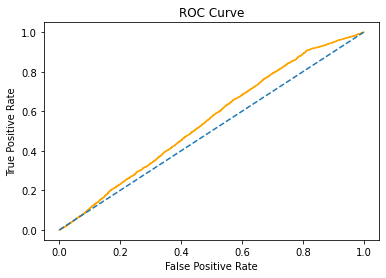

In [693]:
fpr_list1, tpr_list1 = roc_curve(y_val.values, y_pred)